# Utilities

Define \chern command in latex $\newcommand{\chern}{\operatorname{ch}}$

In [1]:
# Requires extra package:
#! sage -pip install "pseudowalls==0.0.3" --extra-index-url https://gitlab.com/api/v4/projects/43962374/packages/pypi/simple
%display latex

from pseudowalls import *

Δ = lambda v: v.Q_tilt()
alpha = stability.Tilt().alpha
beta = stability.Tilt().beta

def beta_minus(v):
    solutions = solve(
        stability.Tilt(alpha=0).degree(v)==0,
        beta)
    return min(map(lambda s: s.rhs(), solutions))

class Object(object):
  pass

Fix a Chern character $v$ with positive rank and $\originalDelta(v) \geq 0$

In [42]:
v = Chern_Char(*var("R C D", domain="real"))
v

Let $u$ be a semistabilizer fitting problem 1 or 2 (destabilizing $v$ going down $\Theta_v^{-}$)

In [43]:
u = Chern_Char(*var("r c d", domain="real"))
u

# Bounds on $\operatorname{ch}_2(u)=d$

In [44]:
var("q", domain="real") # Symbol for q=\chern_1^{\beta}(u)

q

Express $c$ in terms of $q:=\chern_1^{\beta}(u)$

In [49]:
c_in_terms_of_q = solve(q == u.twist(beta).ch[1], c)[0]
assert c_in_terms_of_q.lhs() == c, "Meant to be an expression for c"

In [51]:
c_in_terms_of_q

c == beta*r + q

## $\Delta(u) \geq 0$

Express this inequality in terms of $q$

In [76]:
bgmlv2_with_q = ((0 <= Δ(u))
    .subs(c_in_terms_of_q))

bgmlv2_with_q

0 <= (beta*r + q)^2 - 2*d*r

Rearrange expression for $d$

In [77]:
bgmlv2_d_ineq = (bgmlv2_with_q
    + 2*d*r # move d to rhs
) / (2*r) # scale-out d coefficient (r>0)

assert bgmlv2_d_ineq.lhs() == d, "Should be ineq for d"

bgmlv2_d_ineq

d <= 1/2*(beta*r + q)^2/r

Keep hold of the upper bound for $d$:

In [80]:
bgmlv2_d_upperbound = bgmlv2_d_ineq.rhs().expand()
bgmlv2_d_upperbound

1/2*beta^2*r + beta*q + 1/2*q^2/r

Separate out the terms of this lower bound for d

In [82]:
bgmlv2_d_upperbound_terms = Object()

bgmlv2_d_upperbound_without_hyp = (
    bgmlv2_d_upperbound
    .subs(1/r == 0)
)

bgmlv2_d_upperbound_terms.const = (
    bgmlv2_d_upperbound_without_hyp
    .subs(r==0)
)

bgmlv2_d_upperbound_terms.linear = (
    bgmlv2_d_upperbound_without_hyp
    - bgmlv2_d_upperbound_terms.const
).expand()

bgmlv2_d_upperbound_terms.hyperbolic = (
    bgmlv2_d_upperbound
    - bgmlv2_d_upperbound_without_hyp
).expand()

In [91]:
bgmlv2_d_upperbound_terms.const

beta*q

In [92]:
bgmlv2_d_upperbound_terms.linear

1/2*beta^2*r

In [93]:
bgmlv2_d_upperbound_terms.hyperbolic

1/2*q^2/r

Sanity check:

In [96]:
assert ( bgmlv2_d_upperbound
- bgmlv2_d_upperbound_terms.const
- bgmlv2_d_upperbound_terms.linear
- bgmlv2_d_upperbound_terms.hyperbolic) == 0, "Error in terms separation"

## $\Delta(v-u) \geq 0$

Express this inequality in terms of $q$

In [101]:
bgmlv3_with_q = ((0 <= Δ(v-u))
    .subs(c_in_terms_of_q)
)

bgmlv3_with_q

0 <= (beta*r - C + q)^2 - 2*(D - d)*(R - r)

Rearrange in terms of $d$ assuming $r>R$

In [108]:
bgmlv3_d_ineq = (
    (
        bgmlv3_with_q
        + 2*(D-d)*(R-r) # move d term to lhs
    )/2/(r-R) # assume r>R
) + D

assert bgmlv3_d_ineq.lhs() == d, "Should be bound for d"
assert not bgmlv3_d_ineq.rhs().has(d), "Should be bound for d"

bgmlv3_d_ineq

d <= D - 1/2*(beta*r - C + q)^2/(R - r)

In [10]:

var("r_alt",domain="real") # r_alt = r - R temporary substitution

bgmlv3_with_q_reparam = (
    bgmlv3_with_q
    .subs(r == r_alt + R)
    /r_alt # This operation assumes r_alt > 0
).expand()

bgmlv3_d_ineq = (
    ((0 <= bgmlv3_with_q_reparam)/2 + d) # Rearrange for d
    .subs(r_alt == r - R) # Resubstitute r back in
    .expand()
)

# Check that this equation represents a bound for d
assert bgmlv3_d_ineq.lhs() == d

bgmlv3_d_upperbound = bgmlv3_d_ineq.rhs() # Keep hold of lower bound for d

# Seperate out the terms of the lower bound for d

bgmlv3_d_upperbound_without_hyp = (
    bgmlv3_d_upperbound
    .subs(1/(R-r) == 0)
)

bgmlv3_d_upperbound_const_term = (
    bgmlv3_d_upperbound_without_hyp
    .subs(r==0)
)

bgmlv3_d_upperbound_linear_term = (
    bgmlv3_d_upperbound_without_hyp
    - bgmlv3_d_upperbound_const_term
).expand()

bgmlv3_d_upperbound_exp_term = (
    bgmlv3_d_upperbound
    - bgmlv3_d_upperbound_without_hyp
).expand()

# Verify the simplified forms of the terms that will be mentioned in text

var("psi phi", domain="real") # symbol to represent ch_1^\beta(v) and
# ch_2^\beta(v)

assert bgmlv3_d_upperbound_const_term == ( 
    (
        # keep hold of this alternative expression:
        bgmlv3_d_upperbound_const_term_alt := (
            phi
            + beta*q
        )
    )
    .subs(phi == v.twist(beta).ch[2]) # subs real val of ch_1^\beta(v)
    .expand()
)

assert bgmlv3_d_upperbound_exp_term == (
    (
        # Keep hold of this alternative expression:
        bgmlv3_d_upperbound_exp_term_alt :=
        (
            R*phi
            + (C - q)^2/2
            + R*beta*q
            - D*R
        )/(r-R)
    )
    .subs(phi == v.twist(beta).ch[2]) # subs real val of ch_1^\beta(v)
    .expand()
)

assert bgmlv3_d_upperbound_exp_term == (
    (
        # Keep hold of this alternative expression:
        bgmlv3_d_upperbound_exp_term_alt2 :=
        (
            (psi - q)^2/2/(r-R)
        )
    )
    .subs(psi == v.twist(beta).ch[1]) # subs real val of ch_1^\beta(v)
    .expand()
)

$\renewcommand{\psi}{\chern_1^{\beta}(v)}$
$\renewcommand{\phi}{\chern_2^{\beta}(v)}$
Redefine psi and phi in latex to be $\psi$ and $\phi$

In [11]:
bgmlv3_d_upperbound_linear_term

1/2*beta^2*r

In [12]:
bgmlv3_d_upperbound_const_term_alt

beta*q + phi

In [13]:
bgmlv3_d_upperbound_exp_term_alt2

-1/2*(psi - q)^2/(R - r)

In [14]:
bgmlv2_d_upperbound_linear_term

1/2*beta^2*r

In [15]:
bgmlv2_d_upperbound_const_term

beta*q

In [16]:
bgmlv2_d_upperbound_exp_term

1/2*q^2/r

In [17]:
bgmlv3_d_upperbound_linear_term

1/2*beta^2*r

In [18]:
bgmlv3_d_upperbound_const_term_alt.subs(phi == 0)

beta*q

In [19]:
bgmlv3_d_upperbound_exp_term_alt2

-1/2*(psi - q)^2/(R - r)

## Plots for all Bounds on $d$

In [20]:
positive_radius_condition = (
    (
        (0 > - u.twist(beta).ch[2])
        + d # rearrange for d
    )
    .subs(solve(q == u.twist(beta).ch[1], c)[0]) # express c in term of q
    .expand()
)


v_example = Chern_Char(3,2,-2)
q_example = 7/3

def plot_d_bound(
    v_example,
    q_example,
    ymax=5,
    ymin=-2,
    xmax=20,
    aspect_ratio=None):

    # Equations to plot imminently representing the bounds on d:
    eq2 = (bgmlv2_d_upperbound
        .subs(R == v_example.ch[0])
        .subs(C == v_example.ch[1])
        .subs(D == v_example.ch[2])
        .subs(beta = beta_minus(v_example))
        .subs(q == q_example)
    )

    eq3 = (bgmlv3_d_upperbound
        .subs(R == v_example.ch[0])
        .subs(C == v_example.ch[1])
        .subs(D == v_example.ch[2])
        .subs(beta = beta_minus(v_example))
        .subs(q == q_example)
    )

    eq4 = (positive_radius_condition.rhs()
        .subs(q == q_example)
        .subs(beta = beta_minus(v_example))
    )

    example_bounds_on_d_plot = (
        plot(
            eq3,
            (r,v_example.ch[0],xmax),
            color='green',
            linestyle = "dashed",
            legend_label=r"upper bound: $\Delta(v-u) \geq 0$",
        )
        + plot(
            eq2,
            (r,0,xmax),
            color='blue',
            linestyle = "dashed",
            legend_label=r"upper bound: $\Delta(u) \geq 0$"
        )
        + plot(
            eq4,
            (r,0,xmax),
            color='orange',
            linestyle = "dotted",
            legend_label=r"lower bound: $\mathrm{ch}_2^{\beta_{-}}(u)>0$"
        )
    )
    example_bounds_on_d_plot.ymin(ymin)
    example_bounds_on_d_plot.ymax(ymax)
    example_bounds_on_d_plot.axes_labels(['$r$', '$d$'])
    if aspect_ratio:
        example_bounds_on_d_plot.set_aspect_ratio(aspect_ratio)
    return example_bounds_on_d_plot

### Bounds on $d$ with Minimal $q=\operatorname{ch}^{\beta}_1(u)$

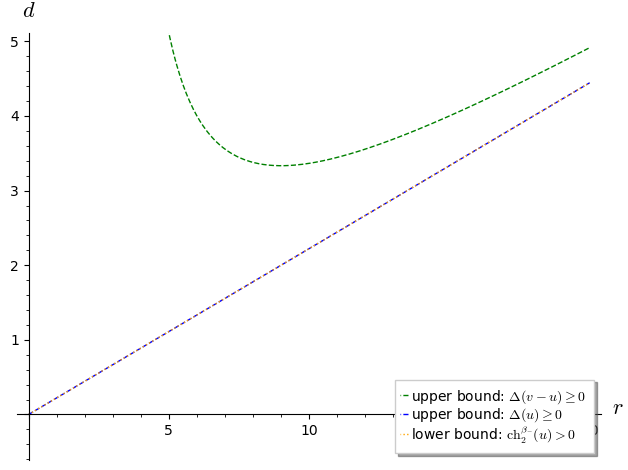

In [21]:
bounds_on_d_qmin = plot_d_bound(v_example, 0, ymin=-0.5)
bounds_on_d_qmin

### Bounds on $d$ with Maximal $q=\operatorname{ch}^{\beta}_1(u)$

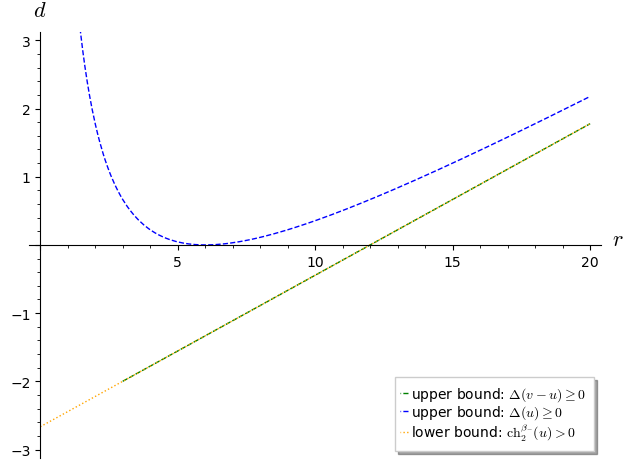

In [22]:
bounds_on_d_qmax = plot_d_bound(v_example, 4, ymin=-3, ymax=3)
bounds_on_d_qmax

### Bounds on $d$ with Mid-way $q=\operatorname{ch}^{\beta}_1(u)$

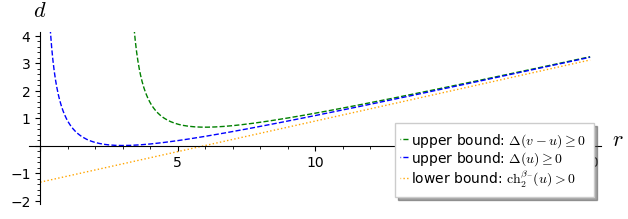

In [23]:
typical_bounds_on_d = plot_d_bound(v_example, 2, ymax=4, ymin=-2, aspect_ratio=1)
typical_bounds_on_d

# Bounds on Semistabilizer Rank $r=\operatorname{ch}_0(u)$

In [24]:
var("a_v b_q n") # Define symbols introduce for values of beta and q
beta_value_expr = (beta == a_v/n)
q_value_expr = (q == b_q/n)
# RENDERED TO LATEX: positive_radius_condition.subs([q_value_expr,beta_value_expr]).factor()
# placeholder for the specific values of k (start with 1):
var("kappa", domain="real")

assymptote_gap_condition1 = (kappa/(2*n^2) < bgmlv2_d_upperbound_exp_term)
assymptote_gap_condition2 = (kappa/(2*n^2) < bgmlv3_d_upperbound_exp_term_alt2)

r_upper_bound1 = (
    assymptote_gap_condition1
    * r * 2*n^2 / kappa
)

assert r_upper_bound1.lhs() == r

r_upper_bound2 = (
    assymptote_gap_condition2
    * (r-R) * 2*n^2 / kappa + R
)

assert r_upper_bound2.lhs() == r

In [25]:
r_upper_bound1.subs(kappa==1).rhs()

n^2*q^2

In [26]:
r_upper_bound2.subs(kappa==1).rhs()

n^2*(psi - q)^2 + R

In [27]:
var("epsilon")
var("chbv") # symbol to represent \chern_1^{\beta}(v)

# Tightness conditions:

bounds_too_tight_condition1 = (
    bgmlv2_d_upperbound_exp_term
    < epsilon
)

bounds_too_tight_condition2 = (
    bgmlv3_d_upperbound_exp_term_alt.subs(chbv==0)
    < epsilon
)

In [28]:
bgmlv2_d_upperbound_exp_term

1/2*q^2/r

In [29]:
bgmlv3_d_upperbound_exp_term_alt2

-1/2*(psi - q)^2/(R - r)

In [30]:
var("Delta nu", domain="real")
# Delta to represent bogomolov(v)

q_sol = solve(
    r_upper_bound1.subs(kappa==1).rhs()
    == r_upper_bound2.subs(kappa==1).rhs()
    , q
)[0].rhs()

r_upper_bound_all_q = (r_upper_bound1.rhs()
    .expand()
    .subs(q==q_sol)
    .subs(kappa==1)
    .subs(psi**2 == Delta/nu^2)
    .subs(1/psi**2 == nu^2/Delta)
)

$\let\originalDelta\Delta$
$\renewcommand\Delta{\originalDelta(v)}$
Redefine \Delta in latex to be $\Delta$

In [31]:
r_upper_bound_all_q.expand()

1/2*R + 1/4*Delta*n^2/nu^2 + 1/4*R^2*nu^2/(Delta*n^2)

In [32]:
r_upper_bound1.subs(kappa==1).rhs()

n^2*q^2

In [33]:
r_upper_bound2.subs(kappa==1).rhs()

n^2*(psi - q)^2 + R

In [34]:
q_sol.expand()

1/2*psi + 1/2*R/(n^2*psi)

In [35]:
r_upper_bound_all_q.expand().subs([nu==1,Delta==psi^2])

1/4*n^2*psi^2 + 1/2*R + 1/4*R^2/(n^2*psi^2)

In [36]:
c_in_terms_of_q.subs([q_value_expr,beta_value_expr])

a_v*r/n + b_q/n

In [37]:
rhs_numerator = (positive_radius_condition
    .rhs()
    .subs([q_value_expr,beta_value_expr])
    .factor()
    .numerator()
)

In [38]:
(positive_radius_condition
     .subs([q_value_expr,beta_value_expr])
     .factor())

d > 1/2*(a_v*r + 2*b_q)*a_v/n^2

In [39]:
var("delta", domain="real") # placeholder symbol to be replaced by k_{q,i}

delta

In [40]:
r_upper_bound1.rhs()

n^2*q^2/kappa

In [41]:
r_upper_bound2.rhs()

n^2*(psi - q)^2/kappa + R